In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'50',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '7be5de94-9cd7-4401-a29d-c401aebf3fbc',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-10-12T09:04:55.815Z', 'error_code': 0, 'error_message': None, 'elapsed': 11, 'credit_count': 1, 'notice': None, 'total_count': 8943}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10488, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd

# Displays the max column and not just a few
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True)
df.head(5)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10488,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.951141e+07,1.951141e+07,False,NaN,1,NaN,NaN,NaN,2023-10-12T09:02:00.000Z,26792.220505,1.229344e+10,4.8141,-0.051924,-1.179158,-3.151341,3.882302,-8.845290,-14.262296,5.227541e+11,49.8802,5.626366e+11,NaN,2023-10-12T09:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 08:05:59.494529+00:00
1,1027,Ethereum,ETH,ethereum,7537,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202536e+08,1.202536e+08,True,NaN,2,NaN,NaN,NaN,2023-10-12T09:02:00.000Z,1557.240189,4.769161e+09,-16.1136,-0.148484,-0.468371,-4.988708,-1.335048,-15.818275,-22.156656,1.872637e+11,17.8684,1.872637e+11,NaN,2023-10-12T09:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 08:05:59.494529+00:00
2,825,Tether USDt,USDT,tether,63486,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.351901e+10,8.662567e+10,True,NaN,3,NaN,NaN,NaN,2023-10-12T09:02:00.000Z,0.999801,1.820187e+10,-5.0876,-0.032137,-0.027762,-0.033265,-0.006732,0.044773,-0.067116,8.350239e+10,7.9684,8.660843e+10,NaN,2023-10-12T09:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-12 08:05:59.494529+00:00
3,1839,BNB,BNB,bnb,1674,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538452e+08,1.538452e+08,False,NaN,4,NaN,NaN,NaN,2023-10-12T09:02:00.000Z,205.109467,2.719387e+08,-38.9383,-0.121195,-0.597487,-3.548163,-1.948105,-14.686375,-20.380339,3.155511e+10,3.0112,3.155511e+10,NaN,2023-10-12T09:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 08:05:59.494529+00:00
4,52,XRP,XRP,xrp,1108,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.344103e+10,9.998836e+10,False,NaN,5,NaN,NaN,NaN,2023-10-12T09:02:00.000Z,0.477241,7.308035e+08,-7.4590,-1.105889,-1.425959,-8.877216,1.015619,-24.115439,-39.204239,2.550423e+10,2.4336,4.772406e+10,NaN,2023-10-12T09:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 08:05:59.494529+00:00


In [5]:
# Automating the process

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'50',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '7be5de94-9cd7-4401-a29d-c401aebf3fbc',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

df2 = pd.json_normalize(data['data'])
df2['timestamp'] = pd.to_datetime('now')
df = df.append[df2]

if not os.path.isfile(r'C:\Users\MY PC\Desktop\datasets\API.csv'):
    df.to_csv(r'C:\Users\MY PC\Desktop\datasets\API.csv', header='column_names')

{'status': {'timestamp': '2023-10-12T09:06:07.401Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 8943}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10488, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\ana\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


TypeError: 'method' object is not subscriptable

In [ ]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('api_runner completed successfully')
    sleep(60) # sleep for 1 minute
exit()

In [6]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10488,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19511412.00000,19511412.00000,False,NaN,1,NaN,NaN,NaN,2023-10-12T09:02:00.000Z,26792.22051,12293437015.46768,4.81410,-0.05192,-1.17916,-3.15134,3.88230,-8.84529,-14.26230,522754052676.18237,49.88020,562636630613.91003,NaN,2023-10-12T09:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 08:05:59.494529+00:00
1,1027,Ethereum,ETH,ethereum,7537,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120253572.44785,120253572.44785,True,NaN,2,NaN,NaN,NaN,2023-10-12T09:02:00.000Z,1557.24019,4769161122.22941,-16.11360,-0.14848,-0.46837,-4.98871,-1.33505,-15.81827,-22.15666,187263695931.18738,17.86840,187263695931.19000,NaN,2023-10-12T09:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 08:05:59.494529+00:00
2,825,Tether USDt,USDT,tether,63486,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83519009631.38924,86625667477.82788,True,NaN,3,NaN,NaN,NaN,2023-10-12T09:02:00.000Z,0.99980,18201866471.62965,-5.08760,-0.03214,-0.02776,-0.03326,-0.00673,0.04477,-0.06712,83502386963.70074,7.96840,86608426496.52000,NaN,2023-10-12T09:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-10-12 08:05:59.494529+00:00
3,1839,BNB,BNB,bnb,1674,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153845220.58852,153845220.58852,False,NaN,4,NaN,NaN,NaN,2023-10-12T09:02:00.000Z,205.10947,271938717.11780,-38.93830,-0.12120,-0.59749,-3.54816,-1.94811,-14.68637,-20.38034,31555111177.50100,3.01120,31555111177.50000,NaN,2023-10-12T09:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 08:05:59.494529+00:00
4,52,XRP,XRP,xrp,1108,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53441027384.00000,99988362642.00000,False,NaN,5,NaN,NaN,NaN,2023-10-12T09:02:00.000Z,0.47724,730803541.24638,-7.45900,-1.10589,-1.42596,-8.87722,1.01562,-24.11544,-39.20424,25504228924.36623,2.43360,47724061779.55000,NaN,2023-10-12T09:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 08:05:59.494529+00:00
5,3408,USDC,USDC,usd-coin,14413,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25214482335.40930,25214482335.40930,False,NaN,6,NaN,NaN,NaN,2023-10-12T09:02:00.000Z,1.00009,2733273634.88103,5.29610,-0.01911,0.00773,0.00500,-0.02286,0.00283,-0.00792,25216789395.41464,2.40610,25216789395.41000,NaN,2023-10-12T09:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-10-12 08:05:59.494529+00:00
6,5426,Solana,SOL,solana,534,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,415996410.89024,559683242.19198,True,NaN,7,NaN,NaN,NaN,2023-10-12T09:02:00.000Z,21.43733,253889531.80314,-6.59300,-1.06634,-3.50134,-6.82979,19.29909,-13.49084,-26.36235,8917850406.59624,0.85100,11998111758.38000,NaN,2023-10-12T09:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-10-12 08:05:59.494529+00:00
7,2010,Cardano,ADA,cardano,944,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35158462126.85600,36244287752.86600,False,NaN,8,NaN,NaN,NaN,2023-10-12T09:02:00.000Z,0.24620,103881691.88885,-13.66060,0.05913,-0.04710,-4.37121,0.19173,-15.31630,-30.19737,8656017710.53975,0.82600,11079005548.3

In [8]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.05192,-1.17916,-3.15134,3.88230,-8.84529,-14.26230
Ethereum,-0.14848,-0.46837,-4.98871,-1.33505,-15.81827,-22.15666
Tether USDt,-0.03214,-0.02776,-0.03326,-0.00673,0.04477,-0.06712
BNB,-0.12120,-0.59749,-3.54816,-1.94811,-14.68637,-20.38034
XRP,-1.10589,-1.42596,-8.87722,1.01562,-24.11544,-39.20424
USDC,-0.01911,0.00773,0.00500,-0.02286,0.00283,-0.00792
Solana,-1.06634,-3.50134,-6.82979,19.29909,-13.49084,-26.36235
Cardano,0.05913,-0.04710,-4.37121,0.19173,-15.31630,-30.19737
Dogecoin,-0.09276,-0.97106,-4.54737,-4.39699,-23.62412,-17.28840


In [9]:
df4 = df3.stack()
df4

name                                           
Bitcoin            quote.USD.percent_change_1h     -0.05192
                   quote.USD.percent_change_24h    -1.17916
                   quote.USD.percent_change_7d     -3.15134
                   quote.USD.percent_change_30d     3.88230
                   quote.USD.percent_change_60d    -8.84529
                   quote.USD.percent_change_90d   -14.26230
Ethereum           quote.USD.percent_change_1h     -0.14848
                   quote.USD.percent_change_24h    -0.46837
                   quote.USD.percent_change_7d     -4.98871
                   quote.USD.percent_change_30d    -1.33505
                   quote.USD.percent_change_60d   -15.81827
                   quote.USD.percent_change_90d   -22.15666
Tether USDt        quote.USD.percent_change_1h     -0.03214
                   quote.USD.percent_change_24h    -0.02776
                   quote.USD.percent_change_7d     -0.03326
                   quote.USD.percent_change_30d    -

In [10]:
type(df4)

pandas.core.series.Series

In [11]:
df5 = df4.to_frame(name='values')
df5

values
name                                                    
Bitcoin           quote.USD.percent_change_1h   -0.05192
                  quote.USD.percent_change_24h  -1.17916
                  quote.USD.percent_change_7d   -3.15134
                  quote.USD.percent_change_30d   3.88230
                  quote.USD.percent_change_60d  -8.84529
                  quote.USD.percent_change_90d -14.26230
Ethereum          quote.USD.percent_change_1h   -0.14848
                  quote.USD.percent_change_24h  -0.46837
                  quote.USD.percent_change_7d   -4.98871
                  quote.USD.percent_change_30d  -1.33505
                  quote.USD.percent_change_60d -15.81827
                  quote.USD.percent_change_90d -22.15666
Tether USDt       quote.USD.percent_change_1h   -0.03214
                  quote.USD.percent_change_24h  -0.02776
                  quote.USD.percent_change_7d   -0.03326
                  quote.USD.percent_change_30d  -0.00673
                  quote.USD.percent_change_60d   0.04477
                  quote.USD.percent_change_90d  -0.06712
BNB               quote.USD.percent_change_1h   -0.12120
                  quote.USD.percent_change_24h  -0.59749
                  quote.USD.percent_change_7d   -3.54816
                  quote.USD.percent_change_30d  -1.94811
                  quote.USD.percent_change_60d -14.68637
                  quote.USD.percent_change_90d -20.38034
XRP               quote.USD.percent_change_1h   -1.10589
                  quote.USD.percent_change_24h  -1.42596
                  quote.USD.percent_change_7d   -8.87722
                  quote.USD.percent_change_30d   1.01562
                  quote.USD.percent_change_60d -24.11544
                  quote.USD.percent_change_90d -39.20424
USDC              quote.USD.percent_change_1h   -0.01911
                  quote.USD.percent_change_24h   0.00773
                  quote.USD.percent_change_7d    0.00500
                  quote.USD.percent_change_30d  -0.02286
                  quote.USD.percent_change_60d   0.00283
                  quote.USD.percent_change_90d  -0.00792
Solana            quote.USD.percent_change_1h   -1.06634
                  quote.USD.percent_change_24h  -3.50134
                  quote.USD.percent_change_7d   -6.82979
                  quote.USD.percent_change_30d  19.29909
                  quote.USD.percent_change_60d -13.49084
                  quote.USD.percent_change_90d -26.36235
Cardano           quote.USD.percent_change_1h    0.05913
                  quote.USD.percent_change_24h  -0.04710
                  quote.USD.percent_change_7d   -4.37121
                  quote.USD.percent_change_30d   0.19173
                  quote.USD.percent_change_60d -15.31630
                  quote.USD.percent_change_90d -30.19737
Dogecoin          quote.USD.percent_change_1h   -0.09276
                  quote.USD.percent_change_24h  -0.97106
                  quote.USD.percent_change_7d   -4.54737
                  quote.USD.percent_change_30d  -4.39699
                  quote.USD.percent_change_60d -23.62412
                  quote.USD.percent_change_90d -17.28840
TRON              quote.USD.percent_change_1h   -0.16234
                  quote.USD.percent_change_24h  -0.16388
                  quote.USD.percent_change_7d   -3.64085
                  quote.USD.percent_change_30d   9.42686
                  quote.USD.percent_change_60d  11.06524
                  quote.USD.percent_change_90d   4.60364
Toncoin           quote.USD.percent_change_1h   -0.48185
                  quote.USD.percent_change_24h   1.08666
                  quote.USD.percent_change_7d    0.59921
                  quote.USD.percent_change_30d  18.76357
                  quote.USD.percent_change_60d  43.85379
                  quote.USD.percent_change_90d  48.37871
Dai               quote.USD.percent_change_1h    0.01550
                  quote.USD.percent_change_24h  -0.03629
                  quote.USD.percent_change_7d   -0.04248
   

In [12]:
df5.count()

values    300
dtype: int64

In [13]:
index = pd.Index(range(300))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.05192
1,Bitcoin,quote.USD.percent_change_24h,-1.17916
2,Bitcoin,quote.USD.percent_change_7d,-3.15134
3,Bitcoin,quote.USD.percent_change_30d,3.88230
4,Bitcoin,quote.USD.percent_change_60d,-8.84529
5,Bitcoin,quote.USD.percent_change_90d,-14.26230
6,Ethereum,quote.USD.percent_change_1h,-0.14848
7,Ethereum,quote.USD.percent_change_24h,-0.46837
8,Ethereum,quote.USD.percent_change_7d,-4.98871
9,Ethereum,quote.USD.percent_change_30d,-1.33505


In [14]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.05192
1,Bitcoin,quote.USD.percent_change_24h,-1.17916
2,Bitcoin,quote.USD.percent_change_7d,-3.15134
3,Bitcoin,quote.USD.percent_change_30d,3.88230
4,Bitcoin,quote.USD.percent_change_60d,-8.84529
5,Bitcoin,quote.USD.percent_change_90d,-14.26230
6,Ethereum,quote.USD.percent_change_1h,-0.14848
7,Ethereum,quote.USD.percent_change_24h,-0.46837
8,Ethereum,quote.USD.percent_change_7d,-4.98871
9,Ethereum,quote.USD.percent_change_30d,-1.33505


In [15]:
df7['percent_change'] = df7['percent_change'].replace('quote.USD.percent_change_', '', regex=True)
df7.head(30)

,name,percent_change,values
0,Bitcoin,1h,-0.05192
1,Bitcoin,24h,-1.17916
2,Bitcoin,7d,-3.15134
3,Bitcoin,30d,3.88230
4,Bitcoin,60d,-8.84529
5,Bitcoin,90d,-14.26230
6,Ethereum,1h,-0.14848
7,Ethereum,24h,-0.46837
8,Ethereum,7d,-4.98871
9,Ethereum,30d,-1.33505


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

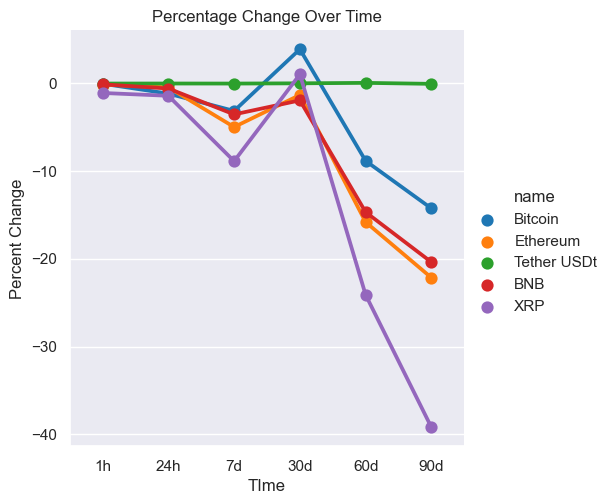

In [23]:
sns.set_theme(style="darkgrid")
palette = sns.color_palette("tab10", n_colors=10)
sns.catplot(x='percent_change', 
            y='values', hue='name', 
            data=df7.head(30), kind='point', palette=palette)
plt.title('Percentage Change Over Time')
plt.xlabel("TIme")
plt.ylabel("Percent Change")
plt.show()

In [24]:
# Top 10 cryptocurrency based on market price
top_10_cryptocurrency = df[["name", "symbol", 
                            "last_updated", 
                            "quote.USD.price", "quote.USD.volume_24h"]]
top_10_cryptocurrency = top_10_cryptocurrency.sort_values("quote.USD.price", ascending=False)
top_10_cryptocurrency.head(10)

,name,symbol,last_updated,quote.USD.price,quote.USD.volume_24h
15,Wrapped Bitcoin,WBTC,2023-10-12T09:02:00.000Z,26803.97950,60610154.71802
0,Bitcoin,BTC,2023-10-12T09:02:00.000Z,26792.22051,12293437015.46768
1,Ethereum,ETH,2023-10-12T09:02:00.000Z,1557.24019,4769161122.22941
31,Maker,MKR,2023-10-12T09:02:00.000Z,1378.61671,37593993.52196
16,Bitcoin Cash,BCH,2023-10-12T09:02:00.000Z,213.74418,108763983.09534
3,BNB,BNB,2023-10-12T09:02:00.000Z,205.10947,271938717.11780
23,Monero,XMR,2023-10-12T09:02:00.000Z,153.19229,70707171.01416
39,Quant,QNT,2023-10-12T09:02:00.000Z,86.36118,9587752.70941
42,Aave,AAVE,2023-10-12T09:02:00.000Z,63.36681,34137664.11277
14,Litecoin,LTC,2023-10-12T09:02:00.000Z,61.21811,176384476.08427


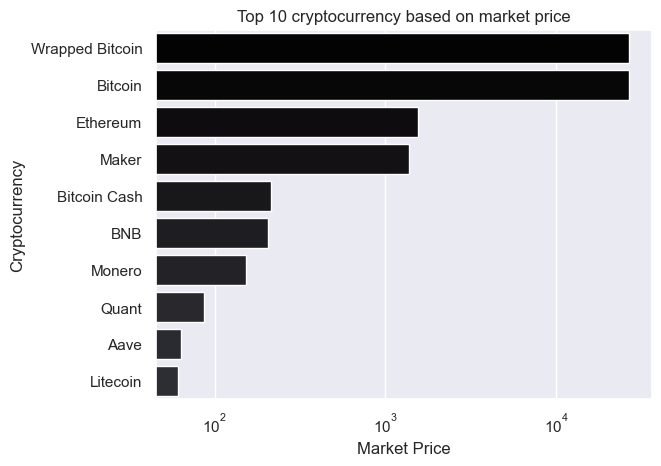

In [25]:
cpal=sns.color_palette("cubehelix",n_colors=64,desat=0.2)
sns.barplot(x="quote.USD.price", 
            y="name",
            data=top_10_cryptocurrency.head(10),
            orient="h",
            palette=cpal)
plt.title('Top 10 cryptocurrency based on market price')
plt.xlabel('Market Price')
plt.ylabel("Cryptocurrency")
plt.xscale('log')
plt.show()

In [26]:
# Top 10 cryptocurrency based on 24 hour volume
top_10_cryptocurrency_volume = top_10_cryptocurrency.sort_values("quote.USD.volume_24h", ascending=False)
top_10_cryptocurrency_volume.head(10)

,name,symbol,last_updated,quote.USD.price,quote.USD.volume_24h
2,Tether USDt,USDT,2023-10-12T09:02:00.000Z,0.99980,18201866471.62965
0,Bitcoin,BTC,2023-10-12T09:02:00.000Z,26792.22051,12293437015.46768
1,Ethereum,ETH,2023-10-12T09:02:00.000Z,1557.24019,4769161122.22941
5,USDC,USDC,2023-10-12T09:02:00.000Z,1.00009,2733273634.88103
4,XRP,XRP,2023-10-12T09:02:00.000Z,0.47724,730803541.24638
27,BUSD,BUSD,2023-10-12T09:02:00.000Z,1.00004,417643137.91509
3,BNB,BNB,2023-10-12T09:02:00.000Z,205.10947,271938717.11780
6,Solana,SOL,2023-10-12T09:02:00.000Z,21.43733,253889531.80314
12,Polygon,MATIC,2023-10-12T09:02:00.000Z,0.51229,207332007.00243
17,Chainlink,LINK,2023-10-12T09:02:00.000Z,7.31039,195189803.83837


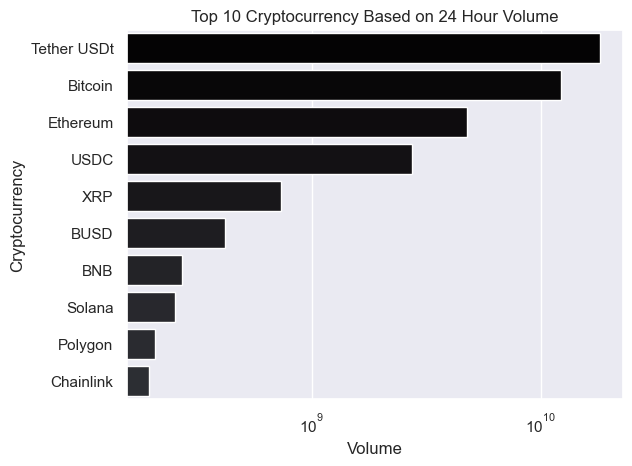

In [27]:
sns.barplot(x="quote.USD.volume_24h", 
            y="name",
            data=top_10_cryptocurrency_volume.head(10),
            orient="h", palette=cpal
            )
plt.title('Top 10 Cryptocurrency Based on 24 Hour Volume')
plt.xlabel('Volume')
plt.ylabel("Cryptocurrency")
plt.xscale('log')
plt.show()